# Segmentation experiment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [42]:
import sys, os
from pathlib import Path
import pandas as pd
import seaborn as sns

project_dir = Path('/ocean/projects/asc170022p/mtragoza')
                           
sys.path.append(str(project_dir / 'param_search'))
import param_search

os.chdir(project_dir / 'mre_ai/replicate/segment')
os.getcwd()

'/ocean/projects/asc170022p/mtragoza/mre_ai/replicate/segment'

In [53]:
# create template script
template_file = 'train_segment.sh'
template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH -A bio170034p
#SBATCH --partition=BatComputer
#SBATCH --gres=gpu:1
#SBATCH --dependency=singleton
#SBATCH --mail-type=fail
#SBATCH --mail-user=mtr22@pitt.edu
#SBATCH -o %J.stdout
#SBATCH -e %J.stderr
{job_params}
hostname
nvidia-smi
source activate mre_ai
python3 ../../../mre_ai/train_seg_model.py \\
    --data_path {data_dir} \\
    --data_file {data_file} \\
    --output_path {output_dir} \\
    --model_version {model_name} \\
    --verbose true \\
    --subj 001 \\
    --def_seq_mode all \\
    --model_arch {model_arch} \\
    --loss dice \\
    --step_size 60 \\
    --num_epochs 100 \\
    --lr 3e-2 \\
    --batch_size 8 \\
    --gamma 0.3 \\
    --bce_weight 0.2 \\
    --test_seq_mode all \\
    --test_aug false \\
    --train_aug true \\
    --val_aug false \\
    --test_clip false \\
    --train_clip false \\
    --val_clip false \\
    --test_color_aug false \\
    --train_color_aug {color_augment} \\
    --val_color_aug false \\
    --worker_init_fn rand_epoch \\
    --dry_run False
'''
with open(template_file, 'w') as f:
    f.write(template)

In [54]:
# define parameter space
param_space = param_search.ParamSpace(
    data_dir='/ocean/projects/asc170022p/bpollack/mre_ai/data/CHAOS/',
    data_file='xarray_chaos_v2.nc',
    output_dir='/ocean/projects/asc170022p/mtragoza/mre_ai/replicate/segment',
    model_arch=['3D', 'ModelsGenesis3D'],
    color_augment=['f', 't'],
    model_name='ASDF',
    group=0,
)
len(param_space)

4

In [55]:
# create job scripts
job_files = param_search.setup(
    expt_dir='',
    name_format='train_segment_{group}_{model_arch}_{color_augment}',
    template_file=template_file,
    param_space=param_space,
)

In [56]:
# submit jobs to cluster
job_ids = param_search.submit(job_files)
job_ids

[5556724, 5556725, 5556726, 5556727]

In [37]:
# monitor job status
qstat = param_search.status(job=job_ids)
qstat

,job_id,queue,job_name,user,job_state,runtime,walltime,node_id,work_dir,array_idx


In [57]:
# check for errors
param_search.errors(job_files)

....

[None,
 None,
 None,
 'wandb: Waiting for W&B process to finish, PID 75719... (failed 1). Press ctrl-c to abort syncing.']

In [58]:
# collect metrics
metrics = param_search.metrics(job_files)
metrics

train_segment_0_ModelsGenesis3D_f/train_segment.sh No objects to concatenate
train_segment_0_ModelsGenesis3D_t/train_segment.sh No objects to concatenate


,epoch,phase,batch,loss,dice,bce,data_dir,data_file,output_dir,model_arch,color_augment,model_name,group,job_name
0,0,train,0,0.733723,0.915989,0.551457,/ocean/projects/asc170022p/bpollack/mre_ai/dat...,xarray_chaos_v2.nc,/ocean/projects/asc170022p/mtragoza/mre_ai/rep...,3D,f,ASDF,0,train_segment_0_3D_f
1,0,train,1,0.980034,0.966880,0.993188,/ocean/projects/asc170022p/bpollack/mre_ai/dat...,xarray_chaos_v2.nc,/ocean/projects/asc170022p/mtragoza/mre_ai/rep...,3D,f,ASDF,0,train_segment_0_3D_f
2,0,train,2,0.798138,0.981443,0.614833,/ocean/projects/asc170022p/bpollack/mre_ai/dat...,xarray_chaos_v2.nc,/ocean/projects/asc170022p/mtragoza/mre_ai/rep...,3D,f,ASDF,0,train_segment_0_3D_f
3,0,train,3,0.592041,0.915532,0.268550,/ocean/projects/asc170022p/bpollack/mre_ai/dat...,xarray_chaos_v2.nc,/ocean/projects/asc170022p/mtragoza/mre_ai/rep...,3D,f,ASDF,0,train_segment_0_3D_f
4,0,train,4,0.580100,0.904259,0.255941,/ocean/projects/asc170022p/bpollack/mre_ai/dat...,xarray_chaos_v2.nc,/ocean/projects/asc170022p/mtragoza/mre_ai/rep...,3D,f,ASDF,0,train_segment_0_3D_f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,99,train,4,0.202841,0.314933,0.090749,/ocean/projects/asc170022p/bpollack/mre_ai/dat...,xarray_chaos_v2.nc,/ocean/projects/asc170022p/mtragoza/mre_ai/rep...,3D,t,ASDF,0,train_segment_0_3D_t
896,99,train,5,0.196536,0.313869,0.079203,/ocean/projects/asc170022p/bpollack/mre_ai/dat...,xarray_chaos_v2.nc,/ocean/projects/asc170022p/mtragoza/mre_ai/rep...,3D,t,ASDF,0,train_segment_0_3D_t
897,99,train,6,0.163434,0.267929,0.058939,/ocean/projects/asc170022p/bpollack/mre_ai/dat...,xarray_chaos_v2.nc,/ocean/projects/asc170022p/mtragoza/mre_ai/rep...,3D,t,ASDF,0,train_segment_0_3D_t
898,99,train,7,0.275293,0.407961,0.142624,/ocean/projects/asc170022p/bpollack/mre_ai/dat...,xarray_chaos_v2.nc,/ocean/projects/asc170022p/mtragoza/mre_ai/rep...,3D,t,ASDF,0,train_segment_0_3D_t


/ocean/projects/asc170022p/mtragoza/param_search/param_search/results.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[group] = df[group_cols].apply(make_group_value, axis=1)


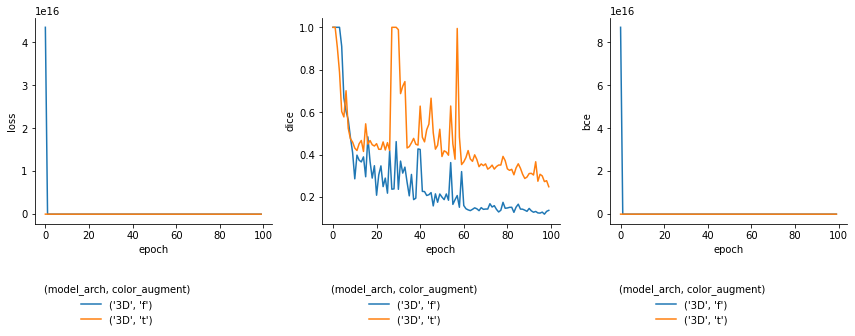

In [59]:
fig = param_search.plot(
    metrics[metrics.phase == 'val'],
    x='epoch',
    y=['loss', 'dice', 'bce'],
    hue=('model_arch', 'color_augment'),
    plot_func=sns.lineplot,
    n_cols=3,
    height=5,
    width=4
)